In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [2]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [3]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [4]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [5]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [6]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [7]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [8]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [9]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [10]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [11]:
df["recommended"] = df["recommended"].astype(int)

In [12]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]

In [13]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

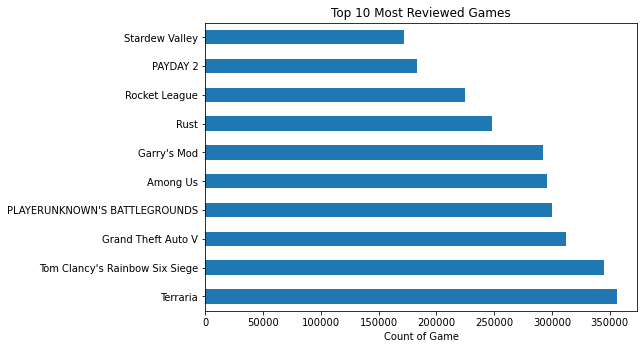

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [15]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


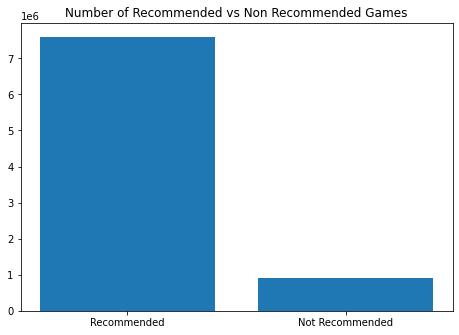

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [17]:
len(df)

8502031

In [18]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
num_yes_rec = len(df[df["recommended"]==1])

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

# The left over data will be used for prediction testing of our classifiers
no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

# Unclassified data set
df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [19]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [20]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [21]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
1372020,3128136,Call of Duty: Infinite Warfare,english,"""Now that's a supply drop"" - Supply Drop Guy 2016",1506475589,1506475589,0,3,1,0,False,False,False,104,18,57.0,0.0,57.0,1.501290e+09
955278,2218230,Sid Meier's Civilization VI,english,Crashes a lot... otherwise fine.,1577566677,1578272032,0,1,1,0,False,False,False,132,1,4813.0,0.0,2474.0,1.584111e+09
7543597,17299541,Fallout 4,english,"Where to begin? The setting is fantastic, the...",1450368808,1450489317,0,41,3,1,True,False,False,289,17,8595.0,0.0,4539.0,1.538014e+09
6348598,14044264,PLAYERUNKNOWN'S BATTLEGROUNDS,english,shitter said finalizing for 473i5378345638765 ...,1585721967,1585721967,0,0,0,0,False,False,False,22,4,9265.0,0.0,9143.0,1.609107e+09
8706197,19868235,Conan Exiles,english,I have been playing this game since its Early ...,1533231673,1551811792,0,2,0,0,True,False,False,108,8,57859.0,0.0,50316.0,1.597168e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058576,6894663,Among Us,english,10/10,1603671023,1603671023,1,1,0,0,True,False,False,25,5,4241.0,0.0,2367.0,1.609380e+09
1703439,3811625,Factorio,english,It's good.,1543169911,1543169911,1,0,0,0,True,False,True,662,7,9319.0,0.0,2492.0,1.605179e+09
5542296,11896422,STAR WARS™ Empire at War: Gold Pack,english,"Very good game, played since i was 9 (now i am...",1508540500,1508540500,1,3,0,0,True,False,False,49,1,24874.0,0.0,793.0,1.602454e+09
2540729,5802174,Stardew Valley,english,One of The greatest Games of our time,1499446006,1499446006,1,0,0,0,True,False,False,91,3,22988.0,447.0,16225.0,1.611159e+09


In [22]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
#updated_df = shuffled[:100000]

updated_df = shuffled

## Normilazation

In [23]:
from sklearn import preprocessing

def calc_norm(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    df_norm = preprocessing.normalize(dataframe[classifier_cols])
    df_norm = pd.DataFrame(df_norm)

    dataframe[classifier_cols] = np.array(df_norm)
    return dataframe

#updated_df = calc_norm(updated_df)
#updated_df

## Standardization

In [24]:
def calc_stand(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    dataframe[classifier_cols] = preprocessing.StandardScaler().fit_transform(dataframe[classifier_cols])

    return dataframe

#updated_df = calc_stand(updated_df)
#updated_df

## Sentiment Analysis

In [25]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [26]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

# updated_df = calc_polarity(updated_df)
# updated_df

In [27]:
#df_test_NB = calc_norm(df_test_NB)
updated_df = calc_stand(updated_df)
updated_df = calc_polarity(updated_df)

## KNN Classification

## Classifier testing on untrained data

## Naive Bayes Classification

In [28]:
#df_test_NB = calc_norm(df_test_NB)
# data_NB = calc_stand(updated_df)
# data_NB = calc_polarity(updated_df)

In [29]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [30]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [31]:
x_train_NB

array([[ 1.85581788,  3.15375686, -0.16796806, -0.5772009 ,  0.25347102,
         0.        ],
       [-0.04081686, -0.02938478, -0.2127486 , -0.45921024,  0.19235022,
         0.9556    ],
       [ 0.05058722, -0.02938478, -0.22234443, -0.2507498 , -0.14381419,
        -0.34      ],
       ...,
       [-0.04081686, -0.02938478, -0.51981515, -0.59897116, -0.32717659,
         0.3999    ],
       [-0.04081686,  0.01195472, -0.340693  , -0.60071688,  0.25347102,
         0.8315    ],
       [ 0.00488518, -0.02938478, -0.45904156, -0.58500533, -0.32717659,
        -0.4588    ]])

In [32]:
y_test_NB

array([1, 1, 0, ..., 1, 1, 1])

In [33]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [34]:
x_test_NB

array([[-0.04081686, -0.02938478, -0.21914582, -0.58870217, -0.32717659,
         0.7125    ],
       [-0.04081686, -0.02938478, -0.05601671, -0.57247717,  1.90373263,
         0.3313    ],
       [-0.01796584, -0.02938478,  1.08268842, -0.51497084,  0.07010861,
        -0.296     ],
       ...,
       [ 0.00488518,  0.46668924,  1.81197149, -0.22168856,  0.43683342,
         0.34      ],
       [-0.04081686, -0.02938478, -0.45264434, -0.3987259 , -0.29661619,
         0.6369    ],
       [-0.01796584,  0.09463373, -0.15517362,  0.83160146,  0.68131662,
         0.7269    ]])

In [35]:
y_test_NB[:40]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [36]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.88827


In [38]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.88827
Precision: 0.9097529585334463
Recall: 0.9715288175743625
F1: 0.9396266176748711


## Classifier testing on untrained data

In [39]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [40]:
#df_test_NB = calc_norm(df_test_NB)
df_test_NB = calc_stand(df_test_NB)
df_test_NB = calc_polarity(df_test_NB)

In [41]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
3633129,Raft,ונטע,0.0000,1,-0.869325,-0.372678,-1.276025,-0.661926,-0.539399
1238489,The Forest,waiting for the forest 2,0.0000,1,-0.869325,-0.372678,0.263307,-0.614680,-0.080910
701601,Sid Meier's Civilization V,it's ok,0.2960,1,-0.869325,-0.372678,-1.205135,1.941959,-0.566369
8295023,Terraria,I love it,0.6369,1,-0.342461,-0.372678,-1.093736,-0.692403,-0.566369
5924013,Batman: Arkham Asylum GOTY Edition,Best Batman game ever made (including rest of ...,0.6369,1,-0.079030,-0.372678,-0.405087,-0.463275,0.215760
7354605,SCUM,the game doesn't even launch after the latest ...,-0.2755,0,-0.079030,-0.372678,-0.577250,-0.712843,-0.404549
6442507,PLAYERUNKNOWN'S BATTLEGROUNDS,They are just money hungry whores now with the...,-0.4019,0,0.447834,-0.372678,1.144372,1.773662,-0.323639
8375102,PAYDAY 2,I don't like payday 2,-0.2755,0,0.711266,0.000000,1.600095,-0.636345,-0.161820
909120,Dead by Daylight,Only buy this game if you want to instantly pl...,0.8271,0,-0.605893,-0.372678,0.982337,0.606357,-0.485459
315264,Portal 2,The developers tried to take advantage of thei...,0.4767,0,2.555287,2.981424,0.567122,-0.540507,2.912755


In [42]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [43]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
3633129,ונטע,1,-0.869325,-0.372678,-1.276025,-0.661926,-0.539399,0.0000
1238489,waiting for the forest 2,1,-0.869325,-0.372678,0.263307,-0.614680,-0.080910,0.0000
701601,it's ok,1,-0.869325,-0.372678,-1.205135,1.941959,-0.566369,0.2960
8295023,I love it,1,-0.342461,-0.372678,-1.093736,-0.692403,-0.566369,0.6369
5924013,Best Batman game ever made (including rest of ...,1,-0.079030,-0.372678,-0.405087,-0.463275,0.215760,0.6369
7354605,the game doesn't even launch after the latest ...,0,-0.079030,-0.372678,-0.577250,-0.712843,-0.404549,-0.2755
6442507,They are just money hungry whores now with the...,0,0.447834,-0.372678,1.144372,1.773662,-0.323639,-0.4019
8375102,I don't like payday 2,0,0.711266,0.000000,1.600095,-0.636345,-0.161820,-0.2755
909120,Only buy this game if you want to instantly pl...,0,-0.605893,-0.372678,0.982337,0.606357,-0.485459,0.8271
315264,The developers tried to take advantage of thei...,0,2.555287,2.981424,0.567122,-0.540507,2.912755,0.4767


In [44]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 1 1 1 1 0]


In [45]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [46]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.6
Precision: 0.5555555555555556
Recall: 1.0
F1: 0.7142857142857143


## XGBoost Classification

In [47]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
4271767,9292865,Tomb Raider,english,https://youtu.be/n785YvD94Rs?t=5,1427959710,1602448095,1,-0.040817,-0.029385,0,True,False,False,-0.385474,-0.266056,722.0,0.0,-0.599485,1.469345e+09,0.0000
7096535,16439065,ARK: Survival Evolved,english,REX,1584262741,1584262741,1,-0.040817,-0.029385,0,False,False,False,-0.430254,-0.296616,45045.0,3824.0,2.653320,1.611142e+09,0.0000
6070218,12979506,Grand Theft Auto V,english,gud gam,1586326183,1586326183,1,-0.040817,-0.029385,0,False,False,False,-0.209550,-0.266056,5561.0,0.0,-0.102979,1.594439e+09,0.0000
1770119,3916632,RimWorld,english,"Probably the most immersive, engaging, and add...",1542946289,1542946289,1,-0.040817,-0.029385,0,True,False,False,0.871580,-0.113254,1835.0,0.0,-0.413205,1.542983e+09,0.7893
8045709,18519111,Terraria,english,🔲 My 90 year old grandma could play it\n☑️ Eas...,1591260490,1591260490,1,-0.017966,-0.029385,0,False,False,False,0.107112,-0.296616,7860.0,0.0,0.143785,1.591548e+09,0.9854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158719,16591636,ARK: Survival Evolved,english,ok,1504112253,1504112253,1,-0.040817,-0.029385,0,True,True,False,-0.340693,-0.327177,280.0,0.0,-0.583773,1.607876e+09,0.2960
8347871,19061718,PAYDAY 2,english,AAAAAAAAAAAAAAAH I NEED A MEDIC BAG,1606345962,1606345962,1,-0.040817,-0.029385,0,True,False,False,1.405748,-0.235495,42237.0,0.0,3.615729,1.609703e+09,0.0000
29620,116067,The Witcher 3: Wild Hunt,english,10/10 game definitely!,1587164820,1587164820,1,-0.040817,-0.029385,0,True,False,False,-0.507021,-0.296616,10913.0,0.0,0.209609,1.603620e+09,0.4574
1176827,2665649,Celeste,english,it's ok i guess,1593568002,1593568002,1,-0.017966,0.053294,1,True,False,False,-0.231940,-0.327177,58129.0,556.0,3.575886,1.610703e+09,0.2960


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [50]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [51]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([1, 1, 0, ..., 0, 1, 0])

In [53]:
y_test_XGB

array([1, 1, 0, ..., 1, 1, 1])

In [54]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.81165
Precision: 0.9682939437721193
Recall: 0.8162670123136747
F1: 0.8858048830765687


## Classifier testing on untrained data

In [ ]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [84]:
#df_test_NB = calc_norm(df_test_NB)
df_test_XGB = calc_stand(df_test_XGB)
df_test_XGB = calc_polarity(df_test_XGB)

In [85]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
7180464,ARK: Survival Evolved,this game is amazing i love it,1,-1.118034,-0.468521,-0.658566,-0.648383,-0.743991,0.8402
187344,Counter-Strike: Source,Old ScooLL <3,1,-1.118034,-0.468521,-0.655919,-0.747926,-0.473449,0.4404
8247676,Terraria,One of my favourite games of all time once u f...,1,1.118034,-0.468521,-0.584451,1.926894,-0.473449,0.7332
2750686,Tom Clancy's Rainbow Six Siege,10/10,1,-1.118034,1.093216,-0.560628,-0.600816,-0.608720,0.0000
4327680,Dishonored,Fantastic! Gonna play second one now.,1,0.000000,-0.468521,-0.613568,-0.546162,-0.608720,0.7424
6238401,Grand Theft Auto V,Thanks for ruining the modding community of gr...,0,1.118034,-0.468521,2.475447,-0.571521,0.473449,0.5994
6741233,The Elder Scrolls Online,0/10\nHow about we remove a good skill Crystal...,0,0.000000,-0.468521,-0.306519,-0.669016,2.367244,0.4075
2683743,Tom Clancy's Rainbow Six Siege,meh,0,-1.118034,-0.468521,-0.478572,-0.664606,-0.473449,-0.0772
6452731,PLAYERUNKNOWN'S BATTLEGROUNDS,🗑️,0,1.118034,2.654954,0.101114,1.616452,-0.743991,0.0000
6426109,PLAYERUNKNOWN'S BATTLEGROUNDS,"When its good, it is great.\nWhen its not, its...",0,1.118034,-0.468521,1.281663,0.905084,1.285075,0.4767


In [86]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [87]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [88]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [89]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.7
Precision: 0.75
Recall: 0.6
F1: 0.6666666666666665


## AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

data_ada = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_ada = updated_df["recommended"]

X_ada = np.array(data_ada)
Y_ada = np.array(labels_ada)

X_train_ada, X_test_ada, y_train_ada, y_test_ada = sklearn.model_selection.train_test_split(X_ada, Y_ada, test_size=0.20, random_state=0)

In [ ]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train_ada, y_train_ada)

In [ ]:
# make predictions for test data
y_pred_ada = model.predict(X_test_ada)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_ada, y_pred_ada))
print("Precision:",metrics.precision_score(y_test_ada, y_pred_ada))
print("Recall:",metrics.recall_score(y_test_ada, y_pred_ada))
print("F1:",metrics.f1_score(y_test_ada, y_pred_ada))

## Ada Classifier testing on untrained data

In [ ]:
# Shuffle the data around
df_test_ada = df_test.sample(frac=1)[0:len(df_test)]
yes_recs = df_test_ada[df_test_ada["recommended"]==1]
no_recs = df_test_ada[df_test_ada["recommended"]==0]
# randomly choose 5 recommended and 5 non recommended reviews
df_test_ada = pd.concat([yes_recs[:5], no_recs[:5]])

In [ ]:
polarityV = []
polarityV_label = []
s = SentimentIntensityAnalyzer()
for review in df_test_ada["review"]:
    sent_dict = s.polarity_scores(str(review))
    polarityV.append(sent_dict['compound'])
    
df_test_ada["polarityV"] = polarityV

# df_test_ada = calc_polarity(df_test_ada)
# df_test_ada

In [ ]:
data_UNT_ada = df_test_ada[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_UNT_ada = df_test_ada["recommended"]

X_UNT_ada = np.array(data_UNT_ada)
Y_UNT_ada = np.array(labels_UNT_ada)

In [ ]:
y_pred_UNT_ada = model.predict(X_UNT_ada

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_UNT_ada, y_pred_UNT_ada))
print("Precision:",metrics.precision_score(Y_UNT_ada, y_pred_UNT_ada))
print("Recall:",metrics.recall_score(Y_UNT_ada, y_pred_UNT_ada))
print("F1:",metrics.f1_score(Y_UNT_ada, y_pred_UNT_ada))

In [ ]:
# Compare results between Knn, Bayes, XGBoost, AdaBoost